In [1]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
pd.set_option("display.max_columns", 50)

In [2]:
# making dataframe from clean data
df = pd.read_csv("../clean_data/clean_victimization_data.csv")
df

,Year,Weight,Sex,Race,Hispanic origin,Race/Hispanic origin,Age,Marital status,Household income,Population size,Region,Location of residence,Victim-offender relationship,Reporting to the police,Presence of Weapon,Weapon category,Aggregate type of crime,Type of crime,Violent crime excluding simple assault,Injury,Medical treatment for physical injuries,Victim services,Location of incident
0,1995,3463.13071,Male,White,Non-Hispanic,Non-Hispanic white,25 to 34,Never married,"50,000 to 74,999","250,000 to 499,999",West,Urban,Stanger,"Yes, reported to the police","No, offender did not have weapon",No weapon,Violent victimization,Robbery,Violent crime excluding simple assault,Not injured,Not injured,No services received from victim service agencies,"Commercial place, parking lot, or other public..."
1,1995,2497.65395,Female,White,Non-Hispanic,Non-Hispanic white,35 to 49,Married,"50,000 to 74,999","Under 100,000",Midwest,Suburban,Stanger,"Yes, reported to the police","No, offender did not have weapon",No weapon,Violent victimization,Simple assault,Simple assault,Not injured,Not injured,No services received from victim service agencies,"Commercial place, parking lot, or other public..."
2,1995,2521.20834,Female,Black,Non-Hispanic,Non-Hispanic black,25 to 34,Never married,"50,000 to 74,999","Under 100,000",Midwest,Suburban,Stanger,"Yes, reported to the police","Yes, offender had weapon",Knife,Violent victimization,Aggravated assault,Violent crime excluding simple assault,Not injured,Not injured,No services received from victim service agencies,"At or near friend, neighbor, or relative's home"
3,1995,2023.97373,Male,White,Non-Hispanic,Non-Hispanic white,25 to 34,Married,"25,000 to 34,999",Not a place,South,Suburban,Stanger,"Yes, reported to the police","No, offender did not have weapon",No weapon,Violent victimization,Simple assault,Simple assault,Not injured,Not injured,No services received from victim service agencies,"Commercial place, parking lot, or other public..."
4,1995,12143.84238,Male,White,Non-Hispanic,Non-Hispanic white,25 to 34,Married,"25,000 to 34,999",Not a place,South,Suburban,Stanger,"Yes, reported to the police","No, offender did not have weapon",No weapon,Violent victimization,Simple assault,Simple assault,Not injured,Not injured,No services received from victim service agencies,"Commercial place, parking lot, or other public..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44700,2018,4923.72993,Female,White,Hispanic,Hispanic,15 to 17,Never married,"75,000 or more","Under 100,000",South,Suburban,Do not know number of offenders,"No, did not report to the police",Do not know if offender had weapon,Do not know if offender had weapon,Personal theft/larceny,Personal theft,Personal theft,Not injured,Not injured,No services received from victim service agencies,School
44701,2018,2570.47232,Male,Black,Non-Hispanic,Non-Hispanic black,50 to 64,Married,"50,000 to 74,999","Under 100,000",South,Suburban,Do not know relationship,"No, did not report to the police","No, offender did not have weapon",No weapon,Violent victimization,Simple assault,Simple assault,Not injured,Not injured,No services received from victim service agencies,At or near victim's home
44702,2018,2224.65724,Female,White,Non-Hispanic,Non-Hispanic white,35 to 49,Separated,"75,000 or more","Under 100,000",Northeast,Suburban,Intimates,"Yes, reported to the police","No, offender did not have weapon",No weapon,Violent victimization,Simple assault,Simple assault,Injured,Not treated for injury,Services received from victim service agencies,At or near victim's home
44703,2018,1676.22725,Male,Black,Non-Hispanic,Non-Hispanic black,65 or older,Widowed,"35,000 to 49,999","Under 100,000",South,Rural,Well-known/casual acquaintances,"Yes, reported to the police","Yes, offender had weapon",Knife,Violent victimization,Aggravated assault,Violent crime excluding simple assault,Injured,Not treated for injury,Services received from vic

In [3]:
df["Race/Hispanic origin"].unique()

array(['Non-Hispanic white', 'Non-Hispanic black', 'Hispanic',
       'Non-Hispanic other'], dtype=object)

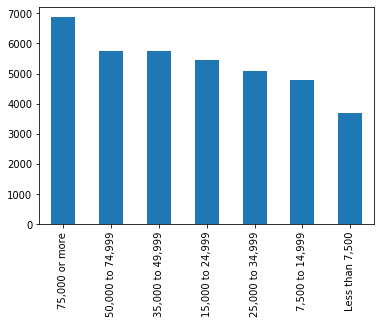

In [4]:
# Plotting broad income range
hincome = df['Household income'].value_counts()
hincome = hincome.drop(hincome.index[0])
hincome.plot(kind='bar')

In [5]:
# Creating dataframes for income by each race
white_df = df[df['Race/Hispanic origin'] == 'Non-Hispanic white']
white_income = white_df['Household income'].value_counts()
white_income = white_income.drop(white_income.index[1])
wi_df = white_income.to_frame()
wi_df = wi_df.reset_index()
wi_df

,index,Household income
0,"75,000 or more",5535
1,"50,000 to 74,999",4524
2,"35,000 to 49,999",4257
3,"25,000 to 34,999",3459
4,"15,000 to 24,999",3455
5,"7,500 to 14,999",2876
6,"Less than 7,500",2115


In [6]:
black_df = df[df['Race/Hispanic origin'] == 'Non-Hispanic black']
black_income = black_df['Household income'].value_counts()
black_income = black_income.drop(black_income.index[0])
bi_df = black_income.to_frame()
bi_df = bi_df.reset_index()
bi_df

,index,Household income
0,"7,500 to 14,999",895
1,"Less than 7,500",866
2,"15,000 to 24,999",865
3,"25,000 to 34,999",589
4,"35,000 to 49,999",531
5,"50,000 to 74,999",399
6,"75,000 or more",367


In [7]:
hispanic_df = df[df['Race/Hispanic origin'] == 'Hispanic']
hispanic_income = hispanic_df['Household income'].value_counts()
hispanic_income = hispanic_income.drop(hispanic_income.index[0])
hi_df= hispanic_income.to_frame().reset_index()
hi_df

,index,Household income
0,"15,000 to 24,999",889
1,"25,000 to 34,999",794
2,"7,500 to 14,999",717
3,"35,000 to 49,999",705
4,"75,000 or more",583
5,"50,000 to 74,999",559
6,"Less than 7,500",493


In [8]:
non_hispanic_df = df[df['Race/Hispanic origin'] == 'Non-Hispanic other']
non_hispanic_income = non_hispanic_df['Household income'].value_counts()
non_hispanic_income = non_hispanic_income.drop(non_hispanic_income.index[1])
nhi_df = non_hispanic_income.to_frame().reset_index()
nhi_df

,index,Household income
0,"75,000 or more",389
1,"7,500 to 14,999",285
2,"50,000 to 74,999",268
3,"15,000 to 24,999",256
4,"25,000 to 34,999",249
5,"35,000 to 49,999",245
6,"Less than 7,500",201


In [9]:
# Merging and renaming
merged_race_income = wi_df.merge(bi_df, on='index')
merged_race_income = merged_race_income.rename(columns={'Household income_x':'White', 'Household income_y':'Black'})

merged_race_income = merged_race_income.merge(hi_df, on='index')
merged_race_income = merged_race_income.merge(nhi_df, on='index')

merged_race_income = merged_race_income.rename(columns={'index':'Household income', 'Household income_x':'Hispanic', 'Household income_y':'Non-Hispanic other'})
merged_race_income

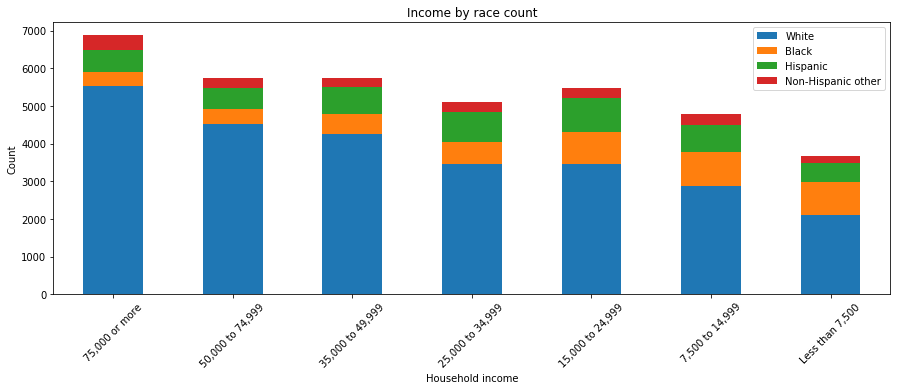

In [16]:
# Displaying and saving bar plot
rbi_bar = merged_race_income.plot(kind='bar', stacked=True, figsize=(15,5))
rbi_bar.set_xticklabels(merged_race_income['Household income'], rotation=45)
rbi_bar.set_title('Income by race count')
rbi_bar.set_xlabel('Household income')
rbi_bar.set_ylabel('Count')
rbi_bar
plt.savefig('income_by_race')
plt.show()